In [1]:
import sys
sys.path.append("../scripts")

from make_lightcurve import make_lc
from make_params import make
from search_nuance import search as nsearch
from search_wotan_tls import search as wsearch, trend
import matplotlib.pyplot as plt

/home/exotic/code/nuance/nuance/nuance.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


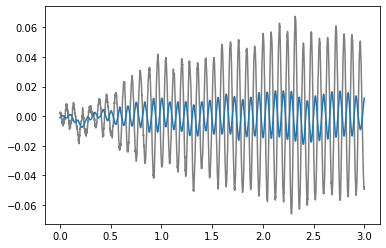

In [2]:
params = make(amp=3, var=1)
x, y, e = make_lc(params, 3)
plt.plot(x, y, c="0.5")
plt.plot(x, trend(x, y, params))

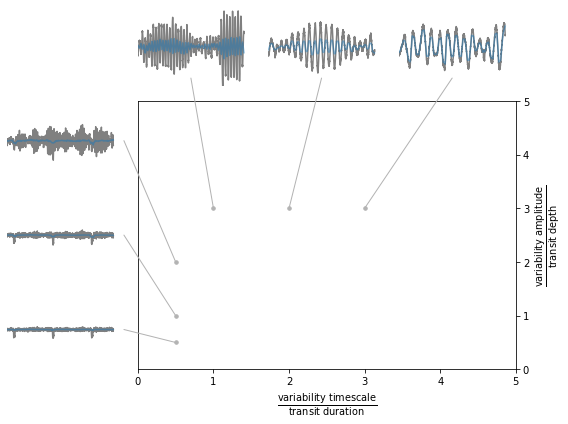

In [11]:
from matplotlib.patches import ConnectionPatch
import numpy as np

n = 4

amp = [0.5, 1, 2, 3][::-1]
var = [0.5, 1, 2, 3]
ymax = 0.06
seed = 4

scale = 1
fig = plt.figure(None, (n*2*scale, n*1.5*scale))

main = plt.subplot(n, n, (n+2,(n-1)*(n+2)))
main.plot()
main.set_xlim(0, 5)
main.set_ylim(0, 5)
main.set_ylabel(r"$\frac{\mathrm{variability\; amplitude}}{\mathrm{transit\;depth}}$", fontsize=14)
main.set_xlabel(r"$\frac{\mathrm{variability\; timescale}}{\mathrm{transit\;duration}}$", fontsize=14)
main.yaxis.set_label_position("right")
main.yaxis.tick_right()

con_color = "0.7"

for i in range(1, 4):
    ax = plt.subplot(n, n, i*n+1)
    a = amp[i]
    v = var[0]
    params = make(amp=a, var=v)
    x, y, e = make_lc(params, seed)
    ax.plot(x, y, c="0.5")
    con = ConnectionPatch(
        xyA=(np.max(x)*1.1, 0.), xyB=(v, a), coordsA="data", coordsB="data",
        axesA=ax, axesB=main, color=con_color)
    fig.add_artist(con)
    ax.set_ylim(-ymax, ymax)
    ax.set_xlim(0., np.max(x)*1.1)
    plt.axis('off')
    main.plot(v, a, ".", c=con_color, ms=7)
    plt.plot(x, trend(x, y, params), alpha=0.5)

    
for i in range(1, 4):
    ax = plt.subplot(n, n, i+1)
    a = amp[0]
    v = var[i]
    params = make(amp=a, var=v)
    x, y, e = make_lc(params, seed)
    plt.plot(x, y, c="0.5")
    con = ConnectionPatch(
    xyA=(np.mean(x), -ymax*0.8), xyB=(v, a), coordsA="data", coordsB="data",
         axesA=ax, axesB=main, color=con_color)
    fig.add_artist(con)
    ax.set_ylim(-ymax, ymax)
    ax.set_xlim(0., np.max(x)*1.1)
    plt.axis('off')
    main.plot(v, a, ".", c=con_color, ms=7)
    plt.plot(x, trend(x, y, params), alpha=0.5)

plt.tight_layout()

In [ ]:
t0, period, wperiods, wpower = wsearch(x, y, e, params, verbose=True)

Transit Least Squares TLS 1.0.31 (22 Nov 2021)
Creating model cache for 24 durations
Searching 2159 data points, 1000 periods from 1.0 to 1.8 days
Using 1 of 6 CPU threads


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 periods | 00:04<00:00


Searching for best T0 for period 1.03764 days


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 985/1000 periods | 00:04<00:00 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 961/1000 periods | 00:04<00:00 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 937/1000 periods | 00:04<00:00 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

In [21]:
_, _, nperiods, npower = nsearch(x, y, e, params, verbose=True)

  0%|          | 0/2160 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

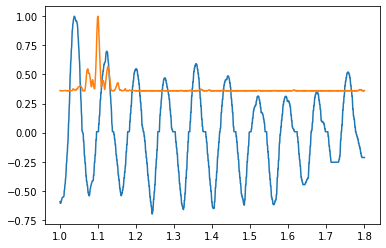

In [32]:
import numpy as np

plt.plot(wperiods, wpower/np.max(wpower))
plt.plot(nperiods, npower/np.max(npower))